# HW 7 - W203

## Abhi Sharma - abhisha@berkeley.edu

In [1]:
wd = getwd()
data = get(load(paste(wd, "/", "gpa1.RData", sep="")))
head(data)
# https://rdrr.io/cran/wooldridge/man/gpa1.html

age,soph,junior,senior,senior5,male,campus,business,engineer,colGPA,...,greek,car,siblings,bgfriend,clubs,skipped,alcohol,gradMI,fathcoll,mothcoll
21,0,0,1,0,0,0,1,0,3.0,...,0,1,1,0,0,2,1.0,1,0,0
21,0,0,1,0,0,0,1,0,3.4,...,0,1,0,1,1,0,1.0,1,1,1
20,0,1,0,0,0,0,1,0,3.0,...,0,1,1,0,1,0,1.0,1,1,1
19,1,0,0,0,1,1,1,0,3.5,...,0,0,1,0,0,0,0.0,0,0,0
20,0,1,0,0,0,0,1,0,3.6,...,0,1,1,1,0,0,1.5,1,1,0
20,0,0,1,0,1,1,1,0,3.0,...,0,1,1,0,0,0,0.0,0,1,0


#### The skipped variable represents the average number of lectures each respondent skips per week. You are interested in testing whether MSU students skip over 1 lecture per week on the average.

In [2]:
unique(data$skipped)

[1] 2.00 0.00 3.00 0.50 1.00 4.00 5.00 0.25

In [3]:
summary(data$skipped)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   1.000   1.076   2.000   5.000 

In [4]:
nrow(data)

[1] 141

In [5]:
mean_skipped = mean(data$skipped)
mean_skipped

[1] 1.076241

In [6]:
sd_skipped = (sd(data$skipped) / sqrt(nrow(data)))
sd_skipped

[1] 0.09170039

### The Hypothesis is set up as follows
#### Ho: Mu_Skipped = 1
#### Ha: Mu_Skipped != 1

#### Examine the skipped variable and argue whether or not a t-test is valid for this scenario.

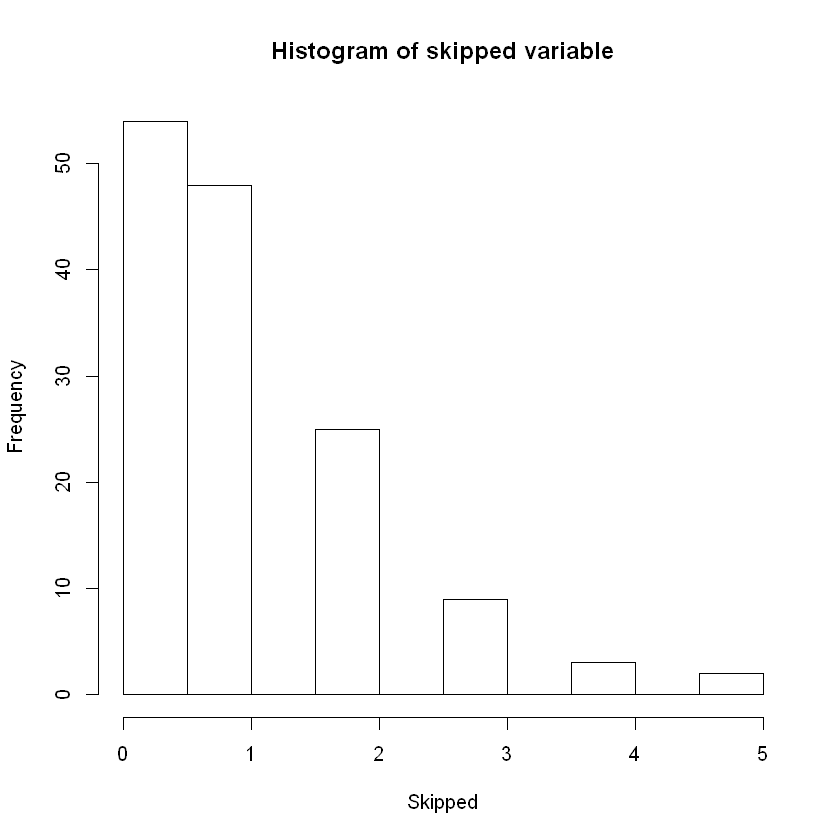

In [7]:
hist(data$skipped, main = "Histogram of skipped variable", xlab= "Skipped")

#### Notes

**ASSUMPTION OF NORMALITY** <br/>
1. Here we are taking our variable under consideration as avg(Skipped). <br/>
2. We know from central limit theorem that regardless of the distribution of a variable (as seen above), its average follows a normal distribution. <br/>
3. So mu_skipped follows a normal distribution with mean = 1.076 and sd = 0.091 <br/>
4. Degrees of freedom = 141-1 = 140 - dof is > 40, so t-test approximates normal distribution<br/><br/>

**ASSUMPTION OF IID** <br/>
1. We can assume the students to be selected at random from the same population (MSU students)<br/> 
2. There is no evidence on the internet that contradicts this / provides the method on how students were selected. <br/>
3. We can assume students to be selected independently - one student selected should have no bearing on another student being selected.<br/>
4. We can assume 141 students chosen is less than 5% of total population of MSU. Hence, even if students were selected without replacement, the student population is indentically distributed <br/>

**Hence, we CAN apply the t-test on mu_skipped**


#### How would your answer to part a change if Mr. Lemmon selected dormitory rooms at random, then interviewed all occupants in the rooms he selected?

We encounter the problem of clustering when sampling if we select candidates using the above technique. It is likely that students who belong to the same dorm will have certain characteristics in common (like times when they wake up for class) - which will jointly influence their skipped scores. <br/>

If a dorm room consists of 5 students, and 3 wake up late for class (and end up skipping X number of classes per week) - it is likely that the other 2 students' "skipped" values will be affected by the 3 late risers. <br/>

**Hence, we CANNOT apply the t-test anymore**


#### Provide an argument for why you should choose a 2-tailed test in this instance, even if you are hoping to demonstrate that MSU students skip more than 1 lecture per week.

This is because with a 1 tail test, we are given a more lenient criteria to reject the null. <br/>
This is because the rejection region has effectively doubled in a 1 tail test (alpha at the tail), compared to a 2 tail test (alpha / 2 at the tail). <br/>
This allows for the test not to be "rigorous" enough because the same p value obtained would have failed a 2 tail test. <br/>


#### Conduct the t-test using the t.test function and interpret every component of the results.

In [8]:
t.test(data$skipped, mu=1)


	One Sample t-test

data:  data$skipped
t = 0.83142, df = 140, p-value = 0.4072
alternative hypothesis: true mean is not equal to 1
95 percent confidence interval:
 0.8949445 1.2575377
sample estimates:
mean of x 
 1.076241 


#### Notes

1. We performed t test on the skipped variable. <br/>
2. We notice the mean is the same as what we observed above in our manual calculation. <br/>
3. Alternative hypothesis states that mu != 1, which represents a 2 tail test. <br/>
4. t statistic is 0.83142, which matches what we compute in the next question. <br/>
5. There is a 95% chance that the many simulations of the intervals contain the true population mean. <br/>
6. The df is 140, which is n-1 for a t test.<br/>
7. The p value is large (for an alpha of 0.05), which means we fail to reject Ho at 0.05 level of significance. <br/>
8. t is 1 0.83 std deviations away from the std mean of 0.<br/>

**In conclusion, we fail to reject Ho at 5% level of significance, which means Ho (mean = 1) prevails as the existing hypothesis** 



#### Show how you would compute the t-statistic and p-value manually (without using t.test), using the pt function in R.

In [9]:
# we can calculate t manually as well
t = (mean_skipped-1)/sd_skipped
t

[1] 0.8314156

In [10]:
# below is the calculation of p value.
# note that we multiply the tail regions by 2 because we do a 2 tail test
# the pt function finds upper tail area (note that lower.tail=FALSE)
# then we multiply that upper tail area by 2
2*(pt(q = t, df = nrow(data)-1, lower.tail = FALSE))

[1] 0.4071547

#### Construct a 99% confidence interval for the mean number classes skipped by MSU students in a week.

In [11]:
# http://seankross.com/notes/dpqr/
# we are doing a 2 tail test, so we need to consider half of (1-0.99) as the area in 1 tail
q = (1 - 0.99) / 2
z = qt(q, df = nrow(data)-1, lower.tail = TRUE)
lower = mean_skipped - abs(z)*sd_skipped
upper = mean_skipped + abs(z)*sd_skipped
paste("lower: ", lower, ",", "upper: ", upper)

[1] "lower:  0.836774482444529 , upper:  1.31570778705902"

#### Can you say that there is a 99% chance the population mean falls inside your confidence interval?

No, we cannot say that because this interval was calculated with 1 sample of 141 observations. <br/>
In the long run if we take 10,000 (say) sets of 141 samples each, and construct an interval for each of those 10,000 sets, then 99% of those intervals will contain the true population mean for skipped variable - that is the meaning of confidence interval